# Run this import modules part and then skip directly to the last section

In [1]:
import cv2 as cv
import PIL as pil
import glob
import numpy as np
import os
import uuid
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import models, layers
from tensorflow import keras
import random

In [2]:
path = 'Signs/All-Signs'
labels = ['Call me','Good job','Good luck','Ok','Victory']

In [2]:
lbl = np.load('Signs/Labels.npy')
img = np.load('Signs/Images.npy',allow_pickle=True)

In [10]:
label = np.load('Signs/label-number.npy')

In [9]:
print(img[0].shape)

(250, 250, 3)


### Detecting skin from images

In [33]:
def extractSkin(image):
    img = image.copy()
    img = cv.cvtColor(img, cv.COLOR_RGB2HSV)
    lower_threshold = np.array([0, 48, 80], dtype=np.uint8)
    upper_threshold = np.array([20, 255, 255], dtype=np.uint8)
    skinMask = cv.inRange(img, lower_threshold, upper_threshold)
    skin = cv.bitwise_and(img, img, mask=skinMask)
    skin = cv.cvtColor(skin, cv.COLOR_HSV2RGB)
    return cv.threshold(skin,0,255,cv.THRESH_BINARY)[1]

In [34]:
skin = extractSkin(img[158])

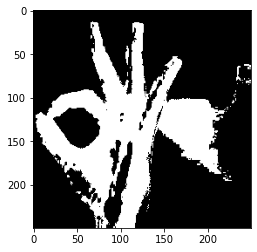

In [35]:
plt.imshow(skin)

In [36]:
lbl[158]

'Ok'

In [37]:
extracted_skin = []
for i in np.copy(img):
    extracted_skin.append(extractSkin(i))

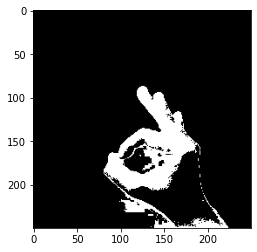

In [38]:
plt.imshow(extracted_skin[0])

In [39]:
type(extracted_skin)

list

In [41]:
images = []
for i,v in enumerate(np.copy(extracted_skin)):
    images.append(cv.cvtColor(cv.resize(v,(250,250)),cv.COLOR_RGB2GRAY))
images = np.array(images,dtype='object')

In [42]:
str2num = {'Call me':0,'Good job':1,'Good luck':2,'Ok':3,'Victory':4}

In [43]:
lbel = []
for l in lbl:
    lbel.append(str2num[l])
lbel = np.array(lbel)

In [45]:
np.save('Signs/extracted-skin/extracted-skin',images)

In [46]:
np.save('Signs/label-number',lbel)

# Training the model

In [47]:
images = np.load('Signs/extracted-skin/extracted-skin.npy',allow_pickle=True)
lbel = np.load('Signs/label-number.npy')
num2str = {0:'Call me',1:'Good job',2:'Good luck',3:'Ok',4:'Victory'}

In [48]:
images.shape

(546, 250, 250)

In [49]:
lbel

array([3, 2, 0, 2, 3, 3, 4, 1, 2, 0, 0, 3, 1, 3, 2, 1, 0, 4, 4, 2, 0, 3,
       3, 0, 0, 0, 0, 0, 2, 0, 2, 2, 1, 3, 3, 3, 0, 3, 3, 0, 2, 0, 2, 0,
       4, 0, 2, 1, 3, 3, 2, 0, 2, 3, 4, 1, 2, 4, 2, 1, 3, 3, 4, 3, 1, 1,
       1, 0, 3, 2, 0, 0, 3, 0, 2, 2, 0, 3, 2, 1, 3, 4, 2, 4, 0, 2, 4, 3,
       1, 4, 1, 4, 4, 3, 2, 2, 0, 0, 2, 1, 0, 1, 3, 1, 3, 4, 4, 3, 3, 0,
       0, 0, 1, 0, 2, 4, 1, 1, 3, 0, 2, 4, 2, 4, 1, 4, 2, 1, 3, 3, 1, 3,
       3, 4, 0, 4, 0, 2, 2, 4, 3, 0, 0, 3, 2, 3, 2, 2, 0, 4, 2, 2, 2, 0,
       0, 3, 3, 2, 3, 3, 1, 2, 3, 2, 4, 1, 2, 1, 1, 1, 1, 0, 1, 2, 4, 3,
       2, 4, 3, 0, 3, 4, 1, 3, 3, 3, 4, 0, 2, 3, 1, 4, 2, 0, 3, 4, 1, 4,
       1, 4, 1, 0, 1, 3, 3, 2, 1, 1, 0, 4, 3, 1, 3, 0, 1, 2, 2, 3, 4, 1,
       2, 2, 2, 2, 4, 0, 1, 0, 3, 2, 4, 0, 0, 1, 4, 3, 1, 2, 0, 4, 0, 2,
       2, 1, 0, 0, 1, 2, 2, 1, 4, 3, 2, 3, 0, 4, 1, 3, 3, 0, 4, 3, 2, 4,
       3, 0, 4, 2, 0, 3, 1, 1, 0, 0, 0, 0, 4, 1, 1, 4, 2, 3, 3, 3, 3, 0,
       2, 1, 1, 2, 1, 0, 0, 1, 3, 2, 3, 1, 1, 2, 3,

In [50]:
images = np.asarray(images).astype('float32').reshape(546,250,250,1)

In [51]:
images = images/255.0

In [52]:
print(images)

[[[[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  ...

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]]


 [[[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  ...

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]]


 [[[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  ...

  [[0.]
   [0.]
   [0.]
   ...
   [1.]
   [1.]
   [1.]]

  [[0.]
   [0.]
   [0.]
   ...
   [1.]
   [1.]
   [1.]]

  [[0.

In [53]:
train_img = images[:400]
train_lbl = lbel[:400]
test_img = images[400:]
test_lbl = lbel[400:]

In [57]:
np.save('Signs/training-data',train_img)
np.save('Signs/training-labels',train_lbl)
np.save('Signs/test-data',test_img)
np.save('Signs/test-labels',test_lbl)

# Model creation and training

In [60]:
train_img = np.load('Signs/training-data.npy')
train_lbl = np.load('Signs/training-labels.npy')
test_img = np.load('Signs/test-data.npy')
test_lbl = np.load('Signs/test-labels.npy')

In [26]:
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(250,250,1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(32,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(500,activation='relu'))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(5))

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 248, 248, 32)      320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 124, 124, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 122, 122, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 61, 61, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 59, 59, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 29, 29, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 27, 27, 64)        3

In [28]:
model.compile(optimizer='adam',loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [85]:
tf.config.run_functions_eagerly(True)

In [29]:
history = model.fit(train_img,train_lbl,epochs=10)

Epoch 1/10
13/13 [==============================] - 20s 1s/step - loss: 1.5761 - accuracy: 0.2575
Epoch 2/10
13/13 [==============================] - 17s 1s/step - loss: 1.1856 - accuracy: 0.5545
Epoch 3/10
13/13 [==============================] - 17s 1s/step - loss: 0.7342 - accuracy: 0.7456
Epoch 4/10
13/13 [==============================] - 17s 1s/step - loss: 0.4045 - accuracy: 0.8703
Epoch 5/10
13/13 [==============================] - 17s 1s/step - loss: 0.2498 - accuracy: 0.9379
Epoch 6/10
13/13 [==============================] - 17s 1s/step - loss: 0.0904 - accuracy: 0.9792
Epoch 7/10
13/13 [==============================] - 17s 1s/step - loss: 0.0713 - accuracy: 0.9773
Epoch 8/10
13/13 [==============================] - 18s 1s/step - loss: 0.0658 - accuracy: 0.9698
Epoch 9/10
13/13 [==============================] - 17s 1s/step - loss: 0.0293 - accuracy: 0.9961
Epoch 10/10
13/13 [==============================] - 17s 1s/step - loss: 0.0074 - accuracy: 0.9970


In [30]:
result = model.evaluate(test_img,test_lbl)

5/5 [==============================] - 2s 354ms/step - loss: 0.9756 - accuracy: 0.8356


In [31]:
model.save('models/sign-detector-model')

INFO:tensorflow:Assets written to: models/sign-detector-model\assets


# Load model for further implementation ; )

In [61]:
model = models.load_model('models/sign-detector-model')
lbl = ['Call me','Good job','Good luck','Ok','Victory']

In [62]:
result = model.evaluate(test_img,test_lbl)

5/5 [==============================] - 5s 401ms/step - loss: 0.9756 - accuracy: 0.8356


In [33]:
def extractSkin(image):
    img = image.copy()
    img = cv.cvtColor(img, cv.COLOR_RGB2HSV)
    lower_threshold = np.array([0, 48, 80], dtype=np.uint8)
    upper_threshold = np.array([20, 255, 255], dtype=np.uint8)
    skinMask = cv.inRange(img, lower_threshold, upper_threshold)
    skin = cv.bitwise_and(img, img, mask=skinMask)
    skin = cv.cvtColor(skin, cv.COLOR_HSV2RGB)
    return cv.threshold(skin,0,255,cv.THRESH_BINARY)[1]

In [39]:
cap = cv.VideoCapture(0)
while True:
    _,frame = cap.read()
    image = extractSkin(frame)
    image = cv.cvtColor(cv.resize(image,(250,250)),cv.COLOR_RGB2GRAY)
    image = np.asarray(image).astype('float32').reshape(1,250,250,1)
    image = image/255.0
    text = lbl[np.argmax(model.predict(image))]
    cv.putText(frame,text,(10,30),cv.FONT_HERSHEY_TRIPLEX,1.0,(0,255,0),2)
    cv.imshow('Frame',frame)
    if cv.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv.destroyAllWindows()